In [1]:
from scipy.stats import chisquare
from scipy import stats
import urllib.request
import string
import requests
from bs4 import BeautifulSoup
import pandas as pd
import multiprocessing
import gensim
import sys
import spacy
nlp=spacy.load('en')
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from scipy import spatial
from collections import Counter
import numpy as np
from collections import defaultdict
from pprint import pprint
from gensim import corpora
import re
import logging
import requests
import urllib 
import re
import sys
import zipfile
from glob import glob
import statsmodels.api as sm
import scipy
import scipy.stats as ss
from scipy.signal import savgol_filter
import random
np.set_printoptions(precision=2)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.corpus import names
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
# Load your usual SpaCy model (one of SpaCy English models)
import spacy
nlp = spacy.load('en')

# load NeuralCoref and add it to the pipe of SpaCy's model
import neuralcoref
coref = neuralcoref.NeuralCoref(nlp.vocab)
nlp.add_pipe(coref, name='neuralcoref')

2019-06-14 11:06:53,031 : INFO : Loading model from /Users/xuhuimin/.neuralcoref_cache/neuralcoref


In [3]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()
    
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def cultureD2(model, words):
    cultures = []
    for word in words:
        if (word[0] in model.wv.vocab) & (word[1] in model.wv.vocab):
            cultures.append(normalize(normalize(model[word[0]]) - normalize(model[word[1]])))
        else:
            print(word)
    culturev = normalize(np.mean(cultures, axis=0))
    return culturev

def storyv(model,words):
    veclist=[]
    for w in words:
        if w in model.wv.vocab:
            veclist.append(normalize(model[w]))
    storyv=normalize(np.mean(veclist,axis=0))
    return storyv

def projection(storyv, culturev):
    # cosine similarity
    return (1 - spatial.distance.cosine(storyv, culturev))
           
def cosine2angle(i):
    return np.arccos(i) / np.pi * 180 #长度换角度

def normalized(x):
    x= np.array(x)
    return (x-np.mean(x))/np.std(x)

def normalization(x):
    x=np.array(x)
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [4]:
swords = [
    ['success','failure'],
    ['succeed','fail'],
    ['lucky', 'unlucky'],
    ['fortunate', 'unfortunate'],
    ['happy', 'unhappy'],
    ['glad', 'sad'],
    ['joy', 'sorrow'],
    ['smile', 'tear']
] # success words

In [5]:
# Load Google's pre-trained Word2Vec model.
# model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

In [6]:
# success_vector = cultureD2(model, swords)
# success_word = [i[0] for i in model.similar_by_vector(success_vector, 1)]

In [5]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [6]:
import re, sys, getopt

PUNCTUATION = [ch for ch in """(){}[]<>!?.:;,`'"@#$%^&*+-|=~/\\_"""]
LETTERS     = [ch for ch in "abcdefghijklmnopqrstuvwxyz"]
CONSONANTS  = [ch for ch in "bcdfghjklmnpqrstvwxz"] # Need this for Mr. Mss. abbreviations.
WHITESPACE  = [ch for ch in " \t\n\r\f\v"]          # Need this to split words.
DASHES      = [ch for ch in u"鈥撯€�"]                  # Not to be confused with hyphen.

is_uppercase   = lambda s: len(s)>0 and s==s.upper()                          # Goodbye => True
is_capitalized = lambda s: len(s)>0 and s[0].isalpha() and s[0]==s[0].upper() # GOODBYE => True

digits = re.compile("^[0-9]+$")
is_int = lambda s: digits.search(s) != None

# regex pattern for entities: &amp; &#164;
entity = "&[a-z]+;|&#[0-9]+;"

class Range(dict):
    
    def __init__(self, items=[]):
        dict.__init__(self, items)
        self.patterns = []
        
    def __contains__(self, str):
        if dict.__contains__(self, str): 
            return True
        for p in self.patterns:
            if p.search(str) != None: 
                return True
        return False

def in_any(word, ranges=[]):
    for rng in ranges:
        if word in rng: return True
        
abbreviations = [
    "Adm.", "Ala.", "Ariz.", "Ark.", "Aug.", "B.C.", "Bancorp.", "Bhd.", "Brig.", "Bros.", "CO.", 
    "CORP.", "COS.", "ca.", "Calif.", "Capt.", "Cie.", "Cmdr.", "Co.", "Col.", "Colo.", "Conn.", "Corp.", 
    "Cos.", "Cpl.", "D-Mass.", "D.C.", "Dec.", "Del.", "Dept.", "Dr.", "E.g.", "Etc.", "Ex.", "Exch.", 
    "Feb.", "Fla.", "Fri.", "Ga.", "Gen.", "Gov.", "INC.", "Ill.", "Inc.", "Ind.", "Jan.", "Jansz.", 
    "Jos.", "Jr.", "Kan.", "Ky.", "L.A.", "La.", "Lt.", "Ltd.", "Maj.", "Mass.", "Md.", "Messrs.", 
    "Mfg.", "Mich.", "Minn.", "Miss.", "Mo.", "Mon.", "Mr.", "Mrs.", "Ms.", "Mt.", "N.C.", "N.J.", 
    "N.Y.", "NFATc.", "Neb.", "Nev.", "No.", "Nos.", "Nov.", "O.J.", "Oct.", "Okla.", "Ont.", "Ore.", 
    "P.T.", "Pa.", "Ph.", "Prof.", "Prop.", "Pty.", "R.I.", "R.J.", "Rep.", "Reps.", "Rev.", "S.C.", 
    "Sat.", "Sen.", "Sens.", "Sep.", "Sept.", "Sgt.", "Sol.", "Sr.", "St.", "Sun.", "Tenn.", "Tex.", 
    "Thu.", "Tue.", "U.K.", "U.N.", "U.S.", "Va.", "Vt.", "W.J.", "W.Va.", "Wash.", "Wed.", "Wis.", 
    "Wyo.", "a.m.", "cit.", "def.", "ed.", "eds.", "e.g.", "etc.", "ft.", "i.e.", "op.", "p.m.", "pp.", 
    "sc.", "v.", "vs.", "Biol.", "Chem.", "beta4.", "Struct.", "Funct.", "Natl.", "Acad.", "Sci.",
    "Biochem.", "Cell.", "Proc.", "Res.", "Lond.", "Nat.", "Dev.", "Camb.", "Profilin.", "Thymosin-beta4."
]

class Abbreviations(Range):
    
    def __init__(self, known=[]):
        """ A dictionary of known abbreviations, extended with patterns of likely abbreviations.
            word in Abbreviations() == True if word is a known or likely abbreviation.
            Periods in English are ambiguous,
            marking end of sentence, abbreviation, decimal point or ellipsis.
            - Simple rule: "every point is a sentence break" is 93.20% correct for Brown corpus.
            - Fix decimal points: 93,64% correct.
            - Fix single letter abbreviations (T. De Smedt), alternating letters (i.e. U.S.),
              and capital letter followed by consonants (Mr. Assn.): 97.7% correct.
            - Fix with dictionary of known abbreviations: up to 99,07 accuracy.
            http://bulba.sdsu.edu/~malouf/ling571/13-token-bw.pdf
        """
        Range.__init__(self, [(x,True) for x in known])
        self.patterns = [
            re.compile("^[A-Za-z]\.$"),                       # single letter, "T. De Smedt"
            re.compile("^([A-Za-z]\.)+$"),                    # alternating letters, "U.S."
            #re.compile(".+\.[,;]$"),                         # followed by punctuation, "dept.,"
            re.compile("^[A-Z]["+"|".join(CONSONANTS)+"]+.$") # capital followed by consonants, "Mr."
        ]
        
    def __contains__(self, word):
        return word.endswith(".") and Range.__contains__(self, word)

abbreviations = Abbreviations(abbreviations)
# # from https://www.clips.uantwerpen.be/BiographTA/tokenizer.py

In [7]:
def pre_process(data):
    for w in abbreviations:
        data = data.replace(w,' ')
    data = data.replace('\r',' ').replace('\n',' ').replace('\t',' ')
    data = re.split('[.?!]',data) # cut the sentence
    tknzr = WordPunctTokenizer()
    data = [tknzr.tokenize(i) for i in data]
    data=[i for i in data if len(i)>1]
    return data

In [8]:
with open('./stopword.txt','r') as f:
    stopword=f.readlines()
stopword=[i.split('\n')[0] for i in stopword]

In [9]:
# 获取名字，性别数据列表
from nltk.corpus import names
male_names = [name for name in names.words('male.txt')]
female_names = [name for name in names.words('female.txt')]
names = male_names+female_names

In [10]:
tknzr = WordPunctTokenizer()

In [11]:
import json
with open("diction.txt","r") as f:
    ediction = json.loads(f.readline())

In [12]:
def get_maintext_lines_script(raw_text):
    lines = raw_text.split("\n")
    start_book_i = 0
    end_book_i = len(lines)-1
    if end_book_i == len(lines)-1:
        for j,line in enumerate(lines):
            if "FADE OUT" in line and j>.9*len(lines):
                end_book_i = j
    if end_book_i == len(lines)-1:
        for j,line in enumerate(lines):
            if "THE END" in line and j>.9*len(lines):
                end_book_i = j
    if end_book_i == len(lines)-1:
        for j,line in enumerate(lines):
            if "- END -" in line and j>.9*len(lines):
                end_book_i = j  
    return lines[(start_book_i+1):(end_book_i)]

In [13]:
def chunkify(lines):
    # put them back together...
    raw_text = "\n".join(lines)
    # remove extra whitespace
    raw_text_1 = re.sub("\n[\\s]+?\n","\n\n",raw_text)
    # remove singleton newlines
    raw_text_2 = re.sub(r"([^\n])\n([^\n])",r"\1 \2",raw_text_1)
    raw_text_3 = raw_text_2.rstrip().lstrip()


    # split on those triples (or more)
    big_chunks = re.split("\n\n\n+",raw_text_3)

    big_chunks = [i for i in big_chunks if len(tknzr.tokenize(i))>20] #remove title,author et al.
    
    if len(big_chunks)!=1:
#         print('error chunk!')
        big_chunks = ['\n\n'.join(big_chunks)]
        
    # break into different cuts
    big_chunks = re.split("CUT TO:",big_chunks[0])
#     print(big_chunks)
    # now break them into the paragraphs
    small_chunks = list(map(lambda x: re.split("\n\n",x),big_chunks))
    combined_chunks = []
    [combined_chunks.extend(el) for el in small_chunks]
    combined_chunks = [i for i in combined_chunks if len(i.strip())>0]
#     combined_chunks = ' '.join(combined_chunks)
#     combined_chunks = []

#     for i in range(len(small_chunks)):
#         for j in range(len(small_chunks[i])):
#             combined_chunks.append((i,j,small_chunks[i][j]))
    return combined_chunks
#     return small_chunks

In [14]:
def main_character(lead):
    lead=[i.title() for i in lead]
    film_name_list = (set(lead) & set(male_names)) |\
                    (set(lead) & set(female_names))
    film_script_wordlist_counter = Counter(lead)
    df = pd.DataFrame([[i, film_script_wordlist_counter[i]] for i in film_name_list]\
                                      , columns=['name', 'count'])
    df['gender']=df['name'].apply(lambda x:'male' if x in male_names else 'female')
    df=df.sort_values(by='count', ascending=False)
    lead = df['name'].values[0]
    lead_gender=df['gender'].values[0]
    if lead_gender=='female':
        lead1=df[df['gender']=='male']['name'].values[0]
    else:
        lead1=df[df['gender']=='female']['name'].values[0]
    return lead,lead_gender,lead1

In [15]:
movie_type=pd.read_csv('./movie_type_e2.csv')

In [16]:
len(movie_type)

913

In [17]:
import spacy
from spacy.symbols import nsubj, nsubjpass, csubj, csubjpass, agent, expl, VERB
nlp1 = spacy.load("en_core_web_sm")

In [21]:
# def tp_eval(x):
#     try:
#         if type(x)==str:
#             return [eval(i) for i in x.replace('\n','').replace('[','').replace(']','').split(' ') if i!='']
#         else:
#             return [i for i in x.replace('\n','').replace('[','').replace(']','').split(' ') if i!='']
#     except:
#         return x

In [18]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

movie_type['tp']=movie_type['tp'].apply(lambda x: eval_(x))

movie_type['emotion']=movie_type['emotion'].apply(lambda x: eval_(x))

In [19]:
movie_type['character']=movie_type['character'].apply(lambda x: eval_(x))

In [20]:
# movie_type['lead_gender']=movie_type['character'].apply(lambda x: x[1] if type(x)==list else np.nan)

In [21]:
movie_type=movie_type.dropna(axis=0,how='any',subset=['lead_gender','tp','emotion'])

In [42]:
# len(movie_type)

In [22]:
# movie_type['character']=movie_type['character'].apply(lambda x: [x[0],x[2],x[1]] if x[1]=='male' else [x[2],x[0],x[1]])

In [53]:
all_pos=[]
gap=5
for i,n in enumerate(movie_type['name'].values):
    try:
        flushPrint(i)
        f = open('./imsdb/'+n+'.txt',"r")
        rawtext = f.read()
        f.close()
        lines = get_maintext_lines_script(rawtext)
        lines1=[]
        for i in range(len(lines)-1):
            if (0<len(tknzr.tokenize(lines[i]))<4):
                if (tknzr.tokenize(lines[i])[-1][-1] not in string.punctuation) & (len(tknzr.tokenize(lines[i]))>0):
                    if lines[i+1]!='':
                        lines1.append(lines[i]+'\n\n')
                    else:
                        lines1.append(lines[i])
            else:
                lines1.append(lines[i])
        chunked = chunkify(lines1)
        male=movie_type[movie_type['name']==n]['character'].values[0][0]
        female=movie_type[movie_type['name']==n]['character'].values[0][1]

        d=pd.DataFrame()
        d['sentence']=chunked
        d['index']=d.index
        d['include']=d['sentence'].apply(lambda x: 'no' if ([i.lower() for i in tknzr.tokenize(x)][-1][-1] \
                        not in string.punctuation) & (len([i.lower() for i in tknzr.tokenize(x)])<6) else 'yes')
        d=d[d['include']=='yes']
        d=d.reset_index(drop=False)

        d['f']=d['sentence'].apply(lambda x: 'yes' if female.lower() in [i.lower() for i in tknzr.tokenize(x)] else 'no')
        d['m']=d['sentence'].apply(lambda x: 'yes' if male.lower() in [i.lower() for i in tknzr.tokenize(x)] else 'no')
        d['a']=d['sentence'].apply(lambda x: 'yes' if (male.lower() in [i.lower() for i in tknzr.tokenize(x)]) or (female.lower() in [i.lower() for i in tknzr.tokenize(x)]) else 'no')

        tp_f=d[d['f']=='yes'].index.values
        tp_m=d[d['m']=='yes'].index.values

        female_all=[]
        for t in tp_f:
            value=[j for j in tknzr.tokenize(d['sentence'].values[t])]
            value=nlp(' '.join(value))._.coref_resolved
            doc = nlp1(value)
            doc=[i.string.split(' ')[0] for i in doc]
            i=[j for j in doc if (len(j)>1) & (j not in string.punctuation)]
            indices = (j for j,word in enumerate(i) if word.lower()==female.lower())
            neighbors = []
            for ind in indices:
                if ind<gap:
                    a=i[0:ind]+i[ind+1:ind+1+gap]
                    neighbors.append([j.lower() for j in a if (j not in names) &(j.lower() not in stopword)])
                else:
                    neighbors.append([j.lower() for j in i[ind-gap:ind]+i[ind+1:ind+1+gap] if (j not in names) &(j.lower() not in stopword)])
            female_all.append(neighbors)

        male_all=[]
        for t in tp_m:
            value=[j for j in tknzr.tokenize(d['sentence'].values[t])]
            value=nlp(' '.join(value))._.coref_resolved
            doc = nlp1(value)
            doc=[i.string.split(' ')[0] for i in doc]
            i=[j for j in doc if (len(j)>1) & (j not in string.punctuation)]
            indices = (j for j,word in enumerate(i) if word.lower()==male.lower())
            neighbors = []
            for ind in indices:
                if ind<gap:
                    a=i[0:ind]+i[ind+1:ind+1+gap]
                    neighbors.append([j.lower() for j in a if (j not in names) &(j.lower() not in stopword)])
                else:
                    neighbors.append([j.lower() for j in i[ind-gap:ind]+i[ind+1:ind+1+gap] if (j not in names) &(j.lower() not in stopword)])
            male_all.append(neighbors)
        all_pos.append([n,female_all,male_all,tp_f,tp_m])
    except Exception as e:
        print(e)
        pass

2

KeyboardInterrupt: 

In [59]:
file=[i[0] for i in all_pos]
female_all=[i[1] for i in all_pos]
male_all=[i[2] for i in all_pos]
tp_f=[i[3] for i in all_pos]
tp_m=[i[4] for i in all_pos]

diction1=dict(zip(file,female_all))
diction2=dict(zip(file,male_all))
diction3=dict(zip(file,tp_f))
diction4=dict(zip(file,tp_m))


movie_type['female_all']=movie_type['name'].apply(lambda x: diction1[x] if x in diction1 else np.nan)
movie_type['male_all']=movie_type['name'].apply(lambda x: diction2[x] if x in diction2 else np.nan)
movie_type['tp_f']=movie_type['name'].apply(lambda x: diction3[x] if x in diction3 else np.nan)
movie_type['tp_m']=movie_type['name'].apply(lambda x: diction4[x] if x in diction4 else np.nan)

In [ ]:
movie_type.to_csv('./movie_type_e2.csv',index=False)

In [47]:
# gap=5
# f = open('./imsdb/'+'12-Years-a-Slave'+'.txt',"r")
# rawtext = f.read()
# f.close()
# lines = get_maintext_lines_script(rawtext)
# lines1=[]
# for i in range(len(lines)-1):
#     if (0<len(tknzr.tokenize(lines[i]))<4):
#         if (tknzr.tokenize(lines[i])[-1][-1] not in string.punctuation) & (len(tknzr.tokenize(lines[i]))>0):
#             if lines[i+1]!='':
#                 lines1.append(lines[i]+'\n\n')
#             else:
#                 lines1.append(lines[i])
#     else:
#         lines1.append(lines[i])
# chunked = chunkify(lines1)
# male=movie_type[movie_type['name']=='12-Years-a-Slave']['character'].values[0][0]
# female=movie_type[movie_type['name']=='12-Years-a-Slave']['character'].values[0][1]

# d=pd.DataFrame()
# d['sentence']=chunked
# d['index']=d.index
# d['include']=d['sentence'].apply(lambda x: 'no' if ([i.lower() for i in tknzr.tokenize(x)][-1][-1] \
#                 not in string.punctuation) & (len([i.lower() for i in tknzr.tokenize(x)])<6) else 'yes')
# d=d[d['include']=='yes']
# d=d.reset_index(drop=False)

# d['f']=d['sentence'].apply(lambda x: 'yes' if female.lower() in [i.lower() for i in tknzr.tokenize(x)] else 'no')
# d['m']=d['sentence'].apply(lambda x: 'yes' if male.lower() in [i.lower() for i in tknzr.tokenize(x)] else 'no')
# d['a']=d['sentence'].apply(lambda x: 'yes' if (male.lower() in [i.lower() for i in tknzr.tokenize(x)]) or (female.lower() in [i.lower() for i in tknzr.tokenize(x)]) else 'no')

# tp_f=d[d['f']=='yes'].index.values
# tp_m=d[d['f']=='yes'].index.values

# female_all=[]
# for t in tp_f:
#     value=[j for j in tknzr.tokenize(d['sentence'].values[t])]
#     value=nlp(' '.join(value))._.coref_resolved
#     doc = nlp1(value)
#     doc=[i.string.split(' ')[0] for i in doc]
#     i=[j for j in doc if (len(j)>1) & (j not in string.punctuation)]
#     indices = (j for j,word in enumerate(i) if word.lower()==female.lower())
#     neighbors = []
#     for ind in indices:
#         if ind<gap:
#             a=i[0:ind]+i[ind+1:ind+1+gap]
#             neighbors.append([j.lower() for j in a if (j not in names) &(j.lower() not in stopword)])
#         else:
#             neighbors.append([j.lower() for j in i[ind-gap:ind]+i[ind+1:ind+1+gap] if (j not in names) &(j.lower() not in stopword)])
#     female_all.append(neighbors)
    
# male_all=[]
# for t in tp_m:
#     value=[j for j in tknzr.tokenize(d['sentence'].values[t])]
#     value=nlp(' '.join(value))._.coref_resolved
#     doc = nlp1(value)
#     doc=[i.string.split(' ')[0] for i in doc]
#     i=[j for j in doc if (len(j)>1) & (j not in string.punctuation)]
#     indices = (j for j,word in enumerate(i) if word.lower()==male.lower())
#     neighbors = []
#     for ind in indices:
#         if ind<gap:
#             a=i[0:ind]+i[ind+1:ind+1+gap]
#             neighbors.append([j.lower() for j in a if (j not in names) &(j.lower() not in stopword)])
#         else:
#             neighbors.append([j.lower() for j in i[ind-gap:ind]+i[ind+1:ind+1+gap] if (j not in names) &(j.lower() not in stopword)])
#     male_all.append(neighbors)

In [116]:
# all_pos=[]
# for i,n in enumerate(movie_type['name'].values):
#     try:
#         flushPrint(i)
#         f = open('./imsdb/'+n+'.txt',"r")
#         rawtext = f.read()
#         f.close()
#         lines = get_maintext_lines_script(rawtext)
#         lines1=[]
#         for i in range(len(lines)-1):
#             if (0<len(tknzr.tokenize(lines[i]))<4):
#                 if (tknzr.tokenize(lines[i])[-1][-1] not in string.punctuation) & (len(tknzr.tokenize(lines[i]))>0):
#                     if lines[i+1]!='':
#                         lines1.append(lines[i]+'\n\n')
#                     else:
#                         lines1.append(lines[i])
#             else:
#                 lines1.append(lines[i])
#         chunked = chunkify(lines1)
#         male=movie_type[movie_type['name']==n]['character'].values[0][0]
#         female=movie_type[movie_type['name']==n]['character'].values[0][1]

#         d=pd.DataFrame()
#         d['sentence']=chunked
#         d['index']=d.index
#         d['include']=d['sentence'].apply(lambda x: 'no' if ([i.lower() for i in tknzr.tokenize(x)][-1][-1] \
#                         not in string.punctuation) & (len([i.lower() for i in tknzr.tokenize(x)])<6) else 'yes')
#         d=d[d['include']=='yes']
#         d=d.reset_index(drop=False)

#         d['f']=d['sentence'].apply(lambda x: 'yes' if female.lower() in [i.lower() for i in tknzr.tokenize(x)] else 'no')
#         d['m']=d['sentence'].apply(lambda x: 'yes' if male.lower() in [i.lower() for i in tknzr.tokenize(x)] else 'no')
#         d['a']=d['sentence'].apply(lambda x: 'yes' if (male.lower() in [i.lower() for i in tknzr.tokenize(x)]) or (female.lower() in [i.lower() for i in tknzr.tokenize(x)]) else 'no')

#         tp=d[d['a']=='yes'].index

#         m_verbs=[]
#         f_verbs=[]
#         m_adjs=[]
#         f_adjs=[]
#         for t in tp:
#             m_verb=[]
#             f_verb=[]
#             m_adj=[]
#             f_adj=[]
#             value=[j for j in tknzr.tokenize(d['sentence'].values[t])]
#             value=nlp(' '.join(value))._.coref_resolved
#             doc = nlp1(value)
#             for token in doc:
#                 if male in token.string:
#                     if (token.dep == nsubj or agent)and token.head.pos == VERB:
#                         m_verb.append(token.head)
#                         a=[i for i in token.children if i.pos_== 'ADJ']
#                         b=[i for i in token.head.children if i.pos_== 'ADJ']
#                         m_adj.extend(a+b)
#                 if female in token.string:
#                     if (token.dep == nsubj or agent)and token.head.pos == VERB:
#                         f_verb.append(token.head)
#                         a=[i for i in token.children if i.pos_== 'ADJ']
#                         b=[i for i in token.head.children if i.pos_== 'ADJ']
#                         f_adj.extend(a+b)
#             m_verbs.append(m_verb)
#             f_verbs.append(f_verb)
#             m_adjs.append(m_adj)
#             f_adjs.append(f_adj)
#         all_pos.append([n,m_verbs,f_verbs,m_adjs,f_adjs])
#     except Exception as e:
#         print(e)
#         pass  

2

KeyboardInterrupt: 

In [118]:
# file=[i[0] for i in all_pos]
# m_verbs=[i[1] for i in all_pos]
# f_verbs=[i[2] for i in all_pos]
# m_adjs=[i[3] for i in all_pos]
# f_adjs=[i[4] for i in all_pos]

# diction1=dict(zip(file,m_verbs))
# diction2=dict(zip(file,f_verbs))
# diction3=dict(zip(file,m_adjs))
# diction4=dict(zip(file,f_adjs))


# movie_type['m_verbs']=movie_type['name'].apply(lambda x: diction1[x] if x in diction1 else np.nan)
# movie_type['f_verbs']=movie_type['name'].apply(lambda x: diction2[x] if x in diction2 else np.nan)
# movie_type['m_adjs']=movie_type['name'].apply(lambda x: diction3[x] if x in diction3 else np.nan)
# movie_type['f_adjs']=movie_type['name'].apply(lambda x: diction4[x] if x in diction4 else np.nan)

In [ ]:
# movie_type.to_csv('./movie_type_e2.csv',index=False)

In [16]:
movie_long=pd.read_csv('./movie_type_e2.csv')

In [18]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

In [19]:
movie_long['tp']=movie_long['tp'].apply(lambda x: eval_(x))
movie_long['emotion']=movie_long['emotion'].apply(lambda x: eval_(x))
movie_long['character']=movie_long['character'].apply(lambda x: eval_(x))

In [22]:
def extend(x):
    c=[]
    for n,i in enumerate(movie_long[x].values):
        match = re.findall('\[.*?\]', i[1:-1])
        match =[re.findall(r'[[](.*?)[]]', j)[0].split(', ') for j in match]
        tp=movie_long['tp'].values[n]
        a=[]
        [a.extend(q) for k,q in enumerate(match) if k in tp]
        a=[j for j in a if len(j)>0]
        c.extend(a)
    return c

In [23]:
female_adj=extend('f_adjs')
male_adj=extend('m_adjs')
female_verb=extend('f_verbs')
male_verb=extend('m_verbs')

In [28]:
len(set(female_adj))

326

In [29]:
len(set(male_adj))

409

In [30]:
len(set(female_verb))

1516

In [31]:
len(set(male_verb))

2174

In [32]:
all_adj=pd.DataFrame(list(set(female_adj)&set(male_adj)),columns=['adj'])

In [35]:
all_adj['score']=all_adj['adj'].apply(lambda x: ediction[x] if x in ediction else np.nan)

In [36]:
def dic(x):
    diction = {}
    cnt = Counter(x)
    for word, freq in cnt.items():
        diction[word] = freq
    return diction

In [37]:
diction=dic(female_adj)
all_adj['female_adj']=all_adj['adj'].apply(lambda x: diction[x] if x in diction else np.nan)

diction=dic(male_adj)
all_adj['male_adj']=all_adj['adj'].apply(lambda x: diction[x] if x in diction else np.nan)

In [51]:
all_adj_e=all_adj[(all_adj['score']<-5)|(all_adj['score']>5)]

In [52]:
all_adj_e['distance']=abs(all_adj_e['female_adj']-all_adj_e['male_adj'])

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
all_adj_e1=all_adj_e.sort_values(by='distance',ascending=False)

In [54]:
all_adj_e1['male_score']=abs(all_adj_e1['score']*all_adj_e1['male_adj'])

In [55]:
all_adj_e1['female_score']=abs(all_adj_e1['score']*all_adj_e1['female_adj'])

In [56]:
all_adj_e1['female_adj'].sum()

212

In [57]:
all_adj_e1['male_adj'].sum()

300

In [58]:
all_adj_e1['female_score'].mean()

29.945322198667224

In [59]:
all_adj_e1['male_score'].mean()

40.503298107066634

In [60]:
all_verb=pd.DataFrame(list(set(female_verb)&set(male_verb)),columns=['verb'])

In [61]:
all_verb['score']=all_verb['verb'].apply(lambda x: ediction[x] if x in ediction else np.nan)

In [62]:
def dic(x):
    diction = {}
    cnt = Counter(x)
    for word, freq in cnt.items():
        diction[word] = freq
    return diction

In [63]:
diction=dic(female_verb)
all_verb['female_verb']=all_verb['verb'].apply(lambda x: diction[x] if x in diction else np.nan)

diction=dic(male_verb)
all_verb['male_verb']=all_verb['verb'].apply(lambda x: diction[x] if x in diction else np.nan)

In [66]:
all_verb_e=all_verb[(all_verb['score']<-5)|(all_verb['score']>5)]

In [67]:
all_verb_e['distance']=abs(all_verb_e['female_verb']-all_verb_e['male_verb'])

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
all_verb_e1=all_verb_e.sort_values(by='male_verb',ascending=False)[:40]

In [69]:
all_verb_e1['male_score']=abs(all_verb_e1['score']*all_verb_e1['male_verb'])

In [70]:
all_verb_e1['female_score']=abs(all_verb_e1['score']*all_verb_e1['female_verb'])

In [71]:
all_verb_e1['male_score'].mean()

376.12833892773295

In [72]:
all_verb_e1['female_score'].mean()

222.68661317945939

In [73]:
all_verb_e1['female_score'].sem()

60.53693373272404

In [74]:
all_verb_e1['male_verb'].sum()

1821

In [75]:
all_verb_e1['female_verb'].sum()

994

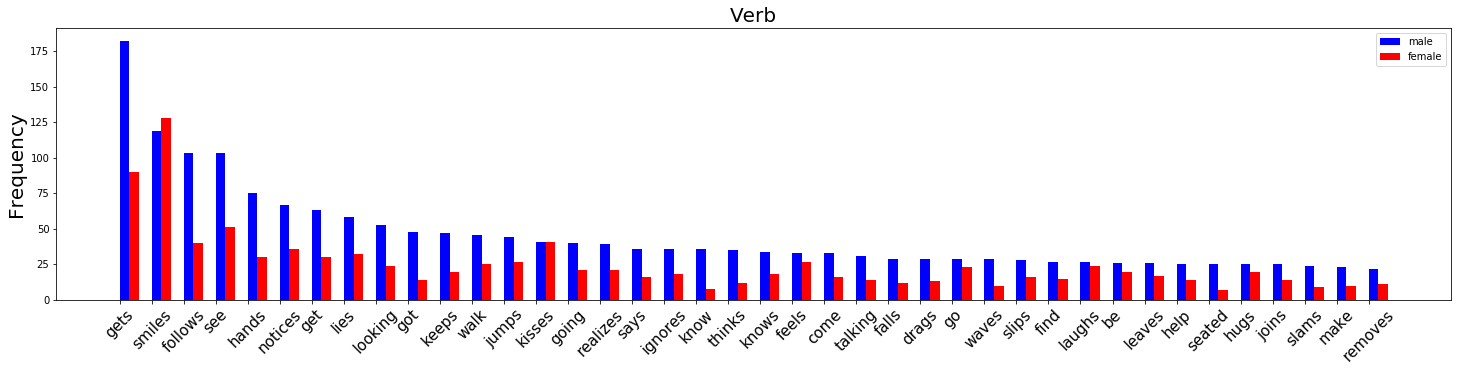

In [76]:
fig = plt.figure(figsize=(25,5))
# ax=fig.add_subplot(4,1,1)
index=np.arange(len(all_verb_e1))
m=all_verb_e1['male_verb'].values
f=all_verb_e1['female_verb'].values
bar_width=0.3
plt.bar(index,m,bar_width,color='b',label='male')
plt.bar(index+bar_width,f,bar_width,color='r',label='female')
plt.ylabel('Frequency',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.xticks([i-0.15 for i in index],[i for i in all_verb_e1['verb'].values])
plt.title('Verb',fontsize=20)
plt.legend()
plt.show()